In [1]:
import os
from glob import glob 
import shutil


In [8]:
origin_list= sorted(glob(r'C:\Users\NM_RR\Desktop\SJ\data\SPECT_data\rest\nonac\*'))
train_A = origin_list[:int(len(origin_list)*0.9)]
val_A = origin_list[int(len(origin_list)*0.9):]

origin_list_B= sorted(glob(r'C:\Users\NM_RR\Desktop\SJ\data\SPECT_data\rest\ac\*'))
train_B = origin_list_B[:int(len(origin_list_B)*0.9)]
val_B = origin_list_B[int(len(origin_list_B)*0.9):]


# origin_list_test_A= sorted(glob(r'C:\Users\NM_RR\Desktop\SJ\data\SPECT_data\rest\nonac\*'))
# origin_list_test_B= sorted(glob(r'C:\Users\NM_RR\Desktop\SJ\data\SPECT_data\rest\ac\*'))
# test_A = origin_list[int(len(origin_list)*0.9):]
# test_B = origin_list_B[int(len(origin_list_B)*0.9):]




In [10]:
for k in val_A:
    print(os.path.basename(k))
    
    shutil.copy(k,os.path.join('C:/Users/NM_RR/Desktop/SJ/Reg-GAN-main/data/val2D/A',os.path.basename(k)))

for h in val_B:
    print(os.path.basename(h))
    
    shutil.copy(h,os.path.join('C:/Users/NM_RR/Desktop/SJ/Reg-GAN-main/data/val2D/B',os.path.basename(h)))

2741322_nonac-001-038.jpg
2741322_nonac-001-039.jpg
2747520_nonac-001-011.jpg
2747520_nonac-001-012.jpg
2747520_nonac-001-013.jpg
2747520_nonac-001-014.jpg
2747520_nonac-001-015.jpg
2747520_nonac-001-016.jpg
2747520_nonac-001-017.jpg
2747520_nonac-001-018.jpg
2747520_nonac-001-019.jpg
2747520_nonac-001-031.jpg
2747520_nonac-001-032.jpg
2747520_nonac-001-033.jpg
2747520_nonac-001-034.jpg
2747520_nonac-001-035.jpg
2747520_nonac-001-036.jpg
2747520_nonac-001-037.jpg
2747520_nonac-001-038.jpg
2747520_nonac-001-039.jpg
7000431_nonac-011.jpg
7000431_nonac-012.jpg
7000431_nonac-013.jpg
7000431_nonac-014.jpg
7000431_nonac-015.jpg
7000431_nonac-016.jpg
7000431_nonac-017.jpg
7000431_nonac-018.jpg
7000431_nonac-019.jpg
7000431_nonac-031.jpg
7000431_nonac-032.jpg
7000431_nonac-033.jpg
7000431_nonac-034.jpg
7000431_nonac-035.jpg
7000431_nonac-036.jpg
7000431_nonac-037.jpg
7000431_nonac-038.jpg
7000431_nonac-039.jpg
7010740_nonac-001-011.jpg
7010740_nonac-001-012.jpg
7010740_nonac-001-013.jpg
701074

In [25]:
for i in train_A:
    print(os.path.basename(i))
    
    shutil.copy(i,os.path.join('C:/Users/NM_RR/Desktop/SJ/Reg-GAN-main/data/train2D/A',os.path.basename(i)))
for j in train_B:
    print(os.path.basename(j))
    
    shutil.copy(i,os.path.join('C:/Users/NM_RR/Desktop/SJ/Reg-GAN-main/data/train2D/B',os.path.basename(j)))
for k in val_A:
    print(os.path.basename(k))
    
    shutil.copy(i,os.path.join('C:/Users/NM_RR/Desktop/SJ/Reg-GAN-main/data/val2D/A',os.path.basename(k)))
for m in val_B:
    print(os.path.basename(m))
    
    shutil.copy(i,os.path.join('C:/Users/NM_RR/Desktop/SJ/Reg-GAN-main/data/val2D/B',os.path.basename(m)))


0006196_nonac-001-011.jpg
0006196_nonac-001-012.jpg
0006196_nonac-001-013.jpg
0006196_nonac-001-014.jpg
0006196_nonac-001-015.jpg
0006196_nonac-001-016.jpg
0006196_nonac-001-017.jpg
0006196_nonac-001-018.jpg
0006196_nonac-001-019.jpg
0006196_nonac-001-031.jpg
0006196_nonac-001-032.jpg
0006196_nonac-001-033.jpg
0006196_nonac-001-034.jpg
0006196_nonac-001-035.jpg
0006196_nonac-001-036.jpg
0006196_nonac-001-037.jpg
0006196_nonac-001-038.jpg
0006196_nonac-001-039.jpg
0006232_nonac-001-011.jpg
0006232_nonac-001-012.jpg
0006232_nonac-001-013.jpg
0006232_nonac-001-014.jpg
0006232_nonac-001-015.jpg
0006232_nonac-001-016.jpg
0006232_nonac-001-017.jpg
0006232_nonac-001-018.jpg
0006232_nonac-001-019.jpg
0006232_nonac-001-031.jpg
0006232_nonac-001-032.jpg
0006232_nonac-001-033.jpg
0006232_nonac-001-034.jpg
0006232_nonac-001-035.jpg
0006232_nonac-001-036.jpg
0006232_nonac-001-037.jpg
0006232_nonac-001-038.jpg
0006232_nonac-001-039.jpg
0008794_nonac-001-011.jpg
0008794_nonac-001-012.jpg
0008794_nona

In [22]:
import yaml
with open('C:/Users/user/Desktop/SJ/Reg-GAN-main/Yaml/Nice.yaml', 'r') as stream:
    
    yaml.full_load(stream)

In [32]:
import cv2
import numpy as np
image = cv2.imread(r'.\data\train2D\A\0619822_nonac-001-018.jpg').astype(np.float32)
print(image.dtype)

float32


In [19]:
import random
import os
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import torch
import cv2
import glob
import matplotlib.pyplot as plt

class ValDataset(Dataset):
    def __init__(self, root,count = None,transforms_=None, unaligned=False):
        self.transform = transforms.Compose([transforms.ToTensor()])
        self.unaligned = unaligned
        self.files_A = sorted(glob.glob(r".\data\test2D\A\*"))
        self.files_B = sorted(glob.glob(r".\data\test2D\B\*"))
        
    def __getitem__(self, index):
        print(self.files_A[index % len(self.files_A)])
        item_A = cv2.imread(self.files_A[index % len(self.files_A)])
        name_A = os.path.basename(self.files_A[index % len(self.files_A)])
        item_A = cv2.resize(item_A,(256,256))
        plt.imshow(item_A)
        plt.show()
        
        # item_A = np.transpose(item_A,(2,0,1))
        item_A = self.transform(item_A)

        if self.unaligned:
            item_B = cv2.imread(self.files_B[random.randint(0, len(self.files_B) - 1)])
            item_B = cv2.resize(item_B,(256,256))
            
            # item_B = np.transpose(item_B,(2,0,1))
            item_B = self.transform(item_B)
        else:
            print(self.files_B[index])
            item_B = cv2.imread(self.files_B[index])
            name_B= os.path.basename(self.files_B[index])
            item_B = cv2.resize(item_B,(256,256))
            plt.imshow(item_B)
            plt.show()
            # item_B = np.transpose(item_B,(2,0,1))
            item_B = self.transform(item_B)
        return {'A': item_A, 'B': item_B, 'name_A': name_A, 'name_B': name_B}
    def __len__(self):
        return max(len(self.files_A), len(self.files_B))

In [20]:
from torch.utils.data import DataLoader
val_data = DataLoader(ValDataset(r'.\data\test2D', transforms_ =None, unaligned=False),
                                batch_size=1, shuffle=False)

.\data\test2D\A\2741322_nonac-001-038.jpg


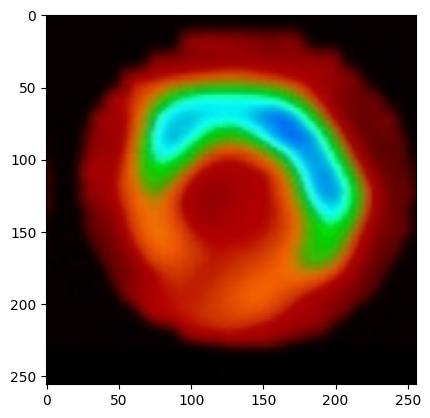

.\data\test2D\B\2741322_ac-001-038.jpg


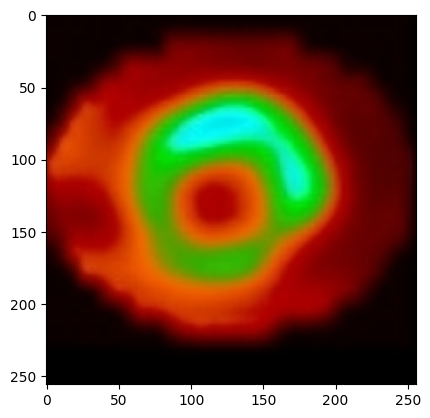

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['2741322_nonac-001-038.jpg']


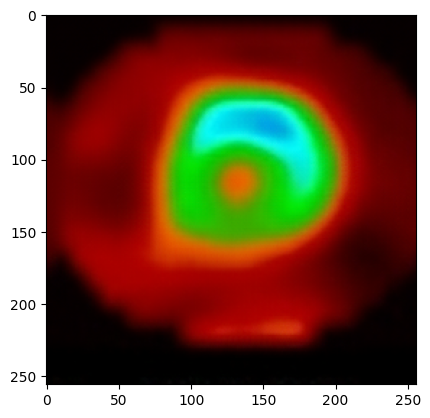

.\data\test2D\A\2741322_nonac-001-039.jpg


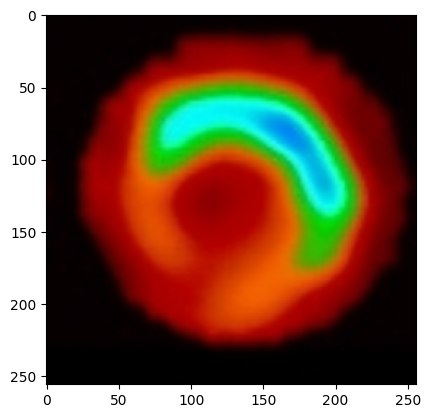

.\data\test2D\B\2741322_ac-001-039.jpg


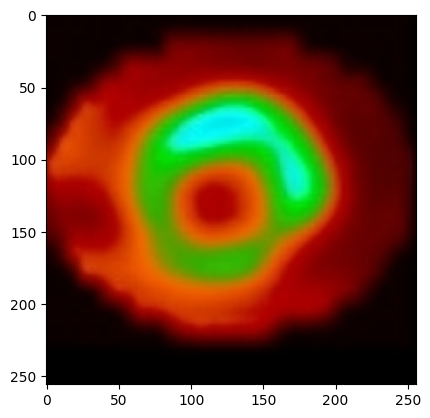

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['2741322_nonac-001-039.jpg']


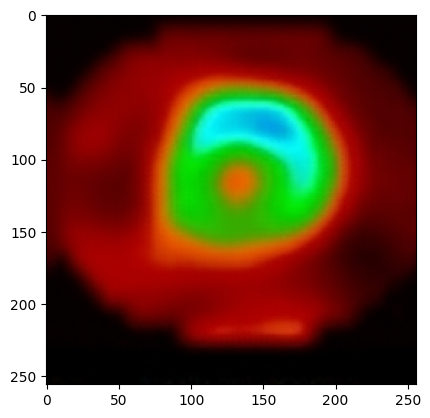

.\data\test2D\A\2747520_nonac-001-011.jpg


KeyboardInterrupt: 

In [21]:
from Model.NiceGan import *
from torch.autograd import Variable
from IQA_pytorch import SSIM, utils
import matplotlib.pyplot as plt

netG_A2B = ResnetGenerator2(3, 3).cuda()
Tensor = torch.cuda.FloatTensor 
input_A = Tensor(1, 3, 256, 256)
input_B = Tensor(1, 3, 256, 256)
netG_A2B.load_state_dict(torch.load(r'C:\Users\NM_RR\Desktop\SJ\Reg-GAN-main\output\Nice\NC+R\netG_A2B.pth'))
with torch.no_grad():
    MAE = 0
    PSNR = 0
    SSIM_1 = 0
    num = 0
    
    for i, batch in enumerate(val_data):
        name_A = batch['name_A']
        print(name_A)
        name_B = batch['name_B']
        real_A = Variable(input_A.copy_(batch['A']))
        real_B_s = Variable(input_B.copy_(batch['B']))
        fake_B_s = netG_A2B(real_A)
        real_B = Variable(input_B.copy_(batch['B'])).detach().cpu().numpy().squeeze()
        fake_B = netG_A2B(real_A).detach().cpu().numpy().squeeze()
        
       
       
        model_ssim = SSIM(channels=3)
        ssim = model_ssim(fake_B_s, real_B_s, as_loss=False)
       
        SSIM_1 += ssim
        
        fake_B = np.transpose(fake_B,(1,2,0))
        real_B = np.transpose(real_B,(1,2,0))
        plt.imshow(fake_B)
        plt.show()
        # plt.savefig('C:/Users/NM_RR/Desktop/SJ/Reg-GAN-main/output/visualized/rest_fake_B/'+str(num)+'.jpg')
        # cv2.imwrite('C:/Users/NM_RR/Desktop/SJ/Reg-GAN-main/output/ex/fake_B/'+name_B[0],fake_B*255)
        # cv2.imwrite('C:/Users/NM_RR/Desktop/SJ/Reg-GAN-main/output/ex/real_B/'+name_B[0] ,real_B*255)
        num += 1

 
    print ('SSIM:',SSIM_1/num)